# 2. Disease prediction

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 EDA uppvärmning

In [81]:
df = pd.read_csv("../Labb/Disease_prediction/cardio_train.csv", sep=";")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [82]:
# since age column in days, we convert it to years and then back to int

df["age"] = round(df["age"]/365).astype(int) 

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


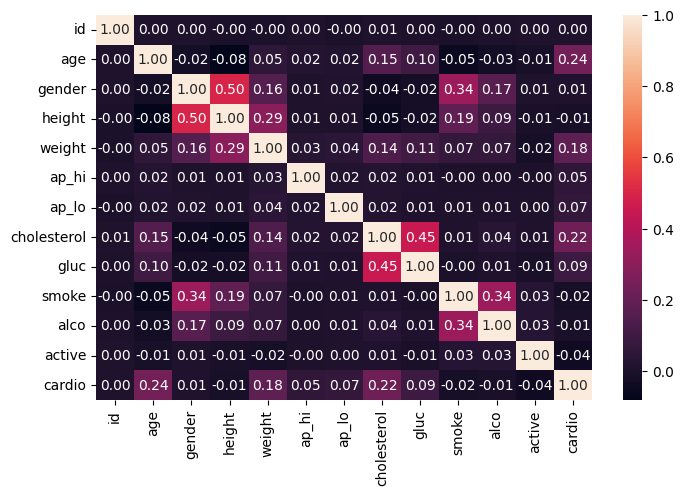

In [83]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [84]:
# find higest and lowest correlation outside of the diagonal

corr = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr = corr[corr["level_0"] != corr["level_1"]]
corr.columns = ["feature1", "feature2", "corr"]

In [85]:
# removes all rows with dupplicate correlation values
corr = corr.drop_duplicates(subset=["corr"], keep="first")

In [86]:
corr.sort_values("corr", ascending=False)
corr = corr.reset_index(drop=True)
corr # highest correlation to lowest

,feature1,feature2,corr
0,height,gender,0.499033
1,cholesterol,gluc,0.451578
2,alco,smoke,0.340094
3,gender,smoke,0.338135
4,height,weight,0.290968
...,...,...,...
73,id,weight,0.001830
74,ap_hi,alco,0.001408
75,alco,id,0.001210
76,smoke,ap_hi,0.000922


In [87]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [88]:
#sns.pairplot(df)

<Axes: xlabel='id', ylabel='weight'>

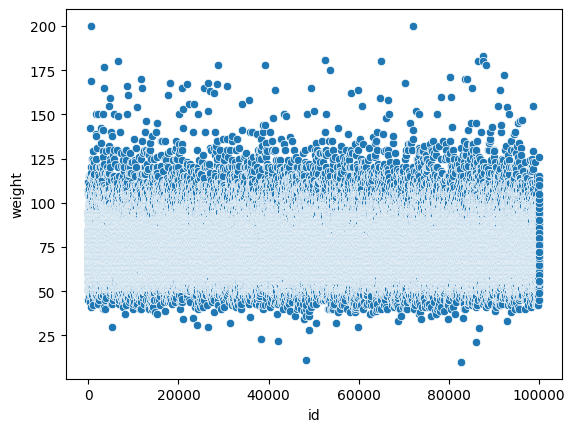

In [89]:
sns.scatterplot(x="id", y="weight", data=df)

In [90]:
df.isnull().sum() # no missing values

df.duplicated().sum() # no duplicates

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2.0 EDA

In [91]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


35021 people are negative
34979 people are positive


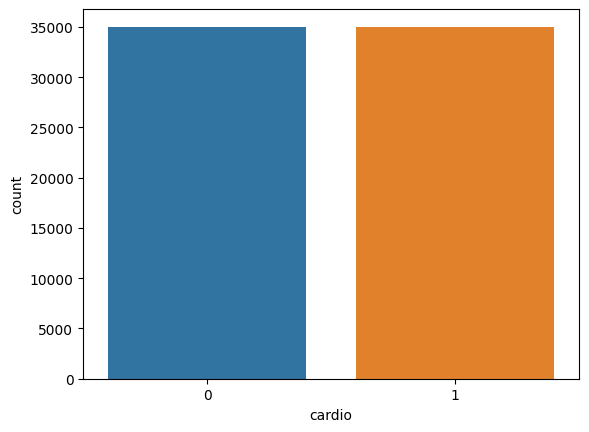

In [92]:
sns.countplot(x="cardio", data=df);
print(f"{df['cardio'][df['cardio']== 0].count()} people are negative")
print(f"{df['cardio'][df['cardio']== 1].count()} people are positive")
# pretty much 50/50

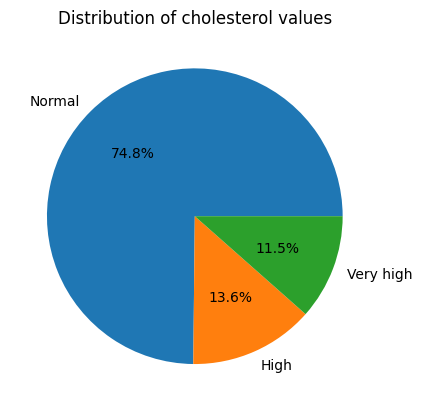

In [93]:
# Uses value_counts() to count the number of each value in the column

labels = ["Normal", "High", "Very high"]
plt.pie(df["cholesterol"].value_counts(), labels=labels, autopct="%1.1f%%")
plt.title("Distribution of cholesterol values")
plt.show()

In [94]:
df['cholesterol'].value_counts(1) # checking the distribution for each number

1    0.748357
2    0.136414
3    0.115229
Name: cholesterol, dtype: float64

Text(0.5, 1.0, 'Distribution of age')

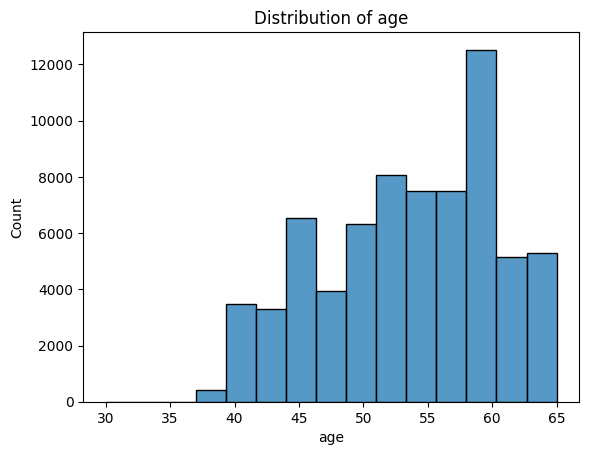

In [95]:
sns.histplot(x="age", data=df, bins=15).set_title("Distribution of age")

Text(0.5, 1.0, 'Distribution of smokers')

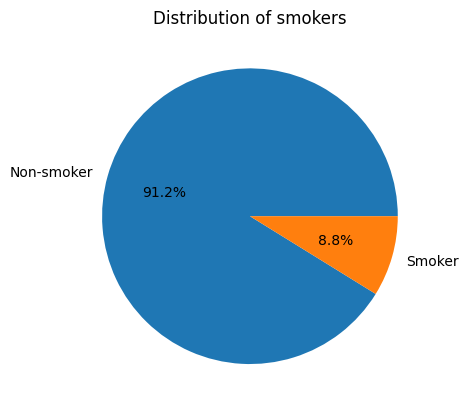

In [96]:
labels = ["Non-smoker", "Smoker"]
plt.pie(df["smoke"].value_counts(), labels=labels, autopct="%1.1f%%");
plt.title("Distribution of smokers")

Text(0.5, 1.0, 'Distribution of weight')

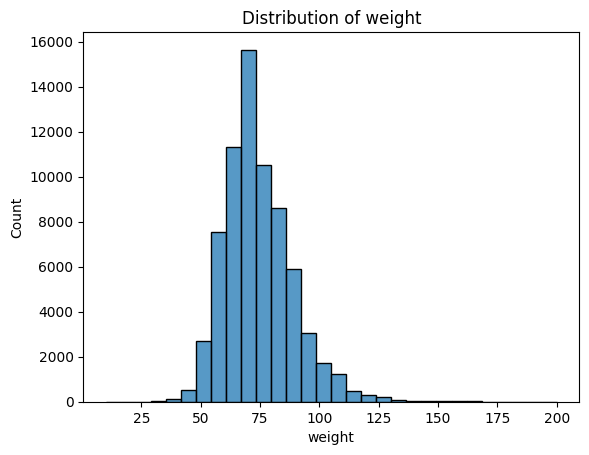

In [97]:
sns.histplot(x=df['weight'], bins=30).set_title("Distribution of weight")

Text(0.5, 1.0, 'Distribution of Height')

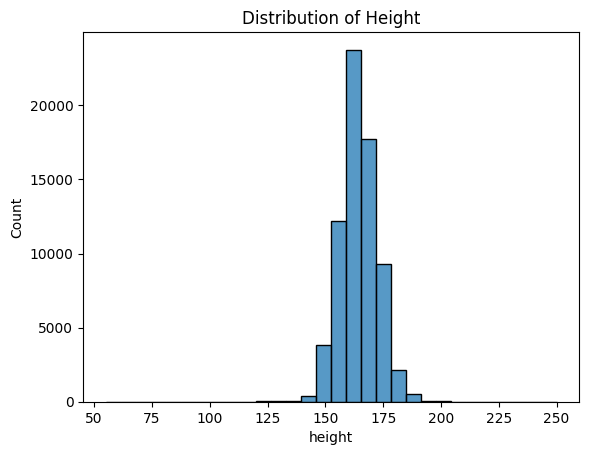

In [98]:
# distribution of weight, and remove outliers
sns.histplot(x=df['height'], bins=30).set_title("Distribution of Height")

<Axes: title={'center': 'Distribution of weight & height'}, xlabel='weight', ylabel='Count'>

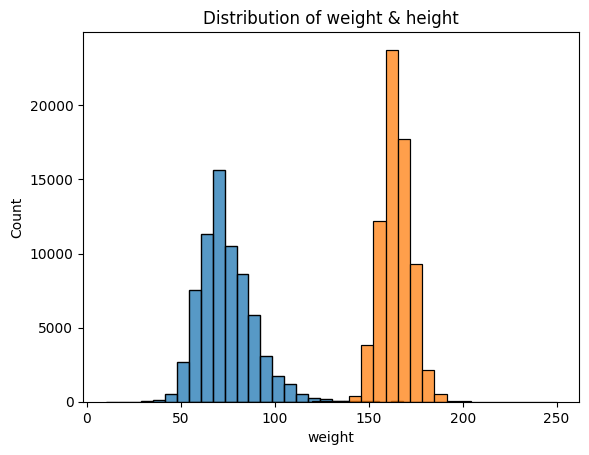

In [99]:
sns.histplot(x=df['weight'], bins=30).set_title("Distribution of weight & height")
sns.histplot(x=df['height'], bins=30)

### Women - 1
### Men - 2

In [100]:
# plot the distribution of gender
df[df['cardio'] == 0]['gender'].value_counts()

1    22914
2    12107
Name: gender, dtype: int64

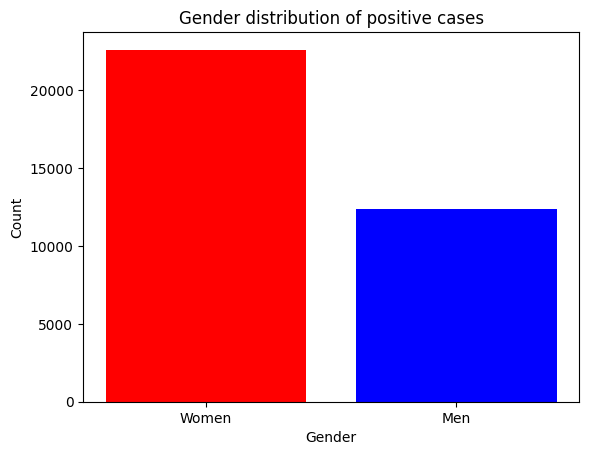

In [101]:
df_pos = df[df['cardio'] == 1]
gender_count = df_pos.groupby(['gender'])['id'].count()

plt.bar(gender_count.index, gender_count.values, color=['red', 'blue'])
plt.title("Gender distribution of positive cases")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([1,2], ['Women', 'Men'])
plt.show()


# 2.1.0 Feature engineering BMI

In [102]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [103]:
# create two new columns: BMI and BMI category
# formula on wikipage is for meter squared that's why we divide by 100

df['BMI'] = df['weight'] / (df['height']/100)**2

- Checking the graph of BMI's on wiki page, we can have our lower and upper limit set to 15 and 50
- Also checked my height & weight, and how much i would need to weigh in order to be within the range.
- limits that are set seem to be reasonable

In [104]:
df['BMI'].min(), df['BMI'].max() # checking outliers

(3.471783865673526, 298.6666666666667)

In [105]:
# remove outliers that are below 15 and above 50
df = df[df['BMI'] > 15]
df = df[df['BMI'] < 50]

df['BMI'].min(), df['BMI'].max()

(15.012197410395949, 49.99999999999999)

In [106]:
# creates a new column for BMI category: [1 - normal range, 2 - overweight, 3 - obese]
# found this really cool way to do it with lambda function
# Source: https://stackoverflow.com/questions/59523793/python-create-a-new-column-using-multiple-conditions

df['BMI_category'] = df['BMI'].apply(lambda x: 1 if x < 25 else 2 if x < 30 else 3)

In [107]:
df['BMI_category'].value_counts()

1    26413
2    25086
3    18230
Name: BMI_category, dtype: int64

# 2.1.1 Feature engineering bloodtryck

In [108]:
print(df['ap_hi'].min(), df['ap_hi'].max()) # checking outliers
print(df['ap_lo'].min(), df['ap_lo'].max())

-150 16020
-70 11000


In [109]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,1
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,2
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,2
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,3
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,2


In [110]:
# removing outliers
# set the limits for systolic blood pressure to 90-200 and for diastolic blood pressure to 60-145
# From what I can find, you have hypotension (low blood pressure) if you go below 90/60.
df = df[df['ap_hi'] > 90]
df = df[df['ap_hi'] < 200] # set it to 200 since the next highest recorded value in the dataset is 197 for systolic blood pressure
# and systolic pressure above 180 is potentially life-threatening, which means not alot of people will have a systolic blood pressure above 200

# diastolic blood pressure limits
# From what I can find, you have hypotension (low blood pressure) if you go below 60 diastolic blood pressure.
df = df[df['ap_lo'] > 60]
df = df[df['ap_lo'] < 145] # set the limit to 145 since the highest recorded value in the dataset is 140 for diastolic blood pressure


df = df[df['ap_hi'] > df['ap_lo']] # removes all rows where the diastolic blood pressure is higher than the systolic blood pressure

for index, row in df.iterrows():
    sys_bp = row['ap_hi']
    dia_bp = row['ap_lo']

    new_col = 'BP_category'

    # Categorize the blood pressure according to the standard guidelines from wikipedia
    if sys_bp < 120 and dia_bp < 80:
        df.at[index, new_col] = 1
    elif sys_bp < 130 and dia_bp < 80:
        df.at[index, new_col] = 2
    elif sys_bp < 140 or dia_bp < 90:
        df.at[index, new_col] = 3
    elif sys_bp < 180 or dia_bp < 120:
        df.at[index, new_col] = 4
    elif sys_bp > 180 or dia_bp > 120:
        df.at[index, new_col] = 5

# converts the BP_category column to int

#df['BP_category'] = df['BP_category'].astype(int)

In [111]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category,BP_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,1,3.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,3,4.0
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,1,3.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,2,4.0
5,8,60,1,151,67.0,120,80,2,2,0,0,0,0,29.384676,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,165,80.0,150,80,1,1,0,0,1,1,29.384757,2,3.0
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,2,3.0
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,3,4.0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,2,3.0


# 2.2.0 Visualiseringar andel sjukdomar

Text(0.5, 1.0, 'Active Categories')

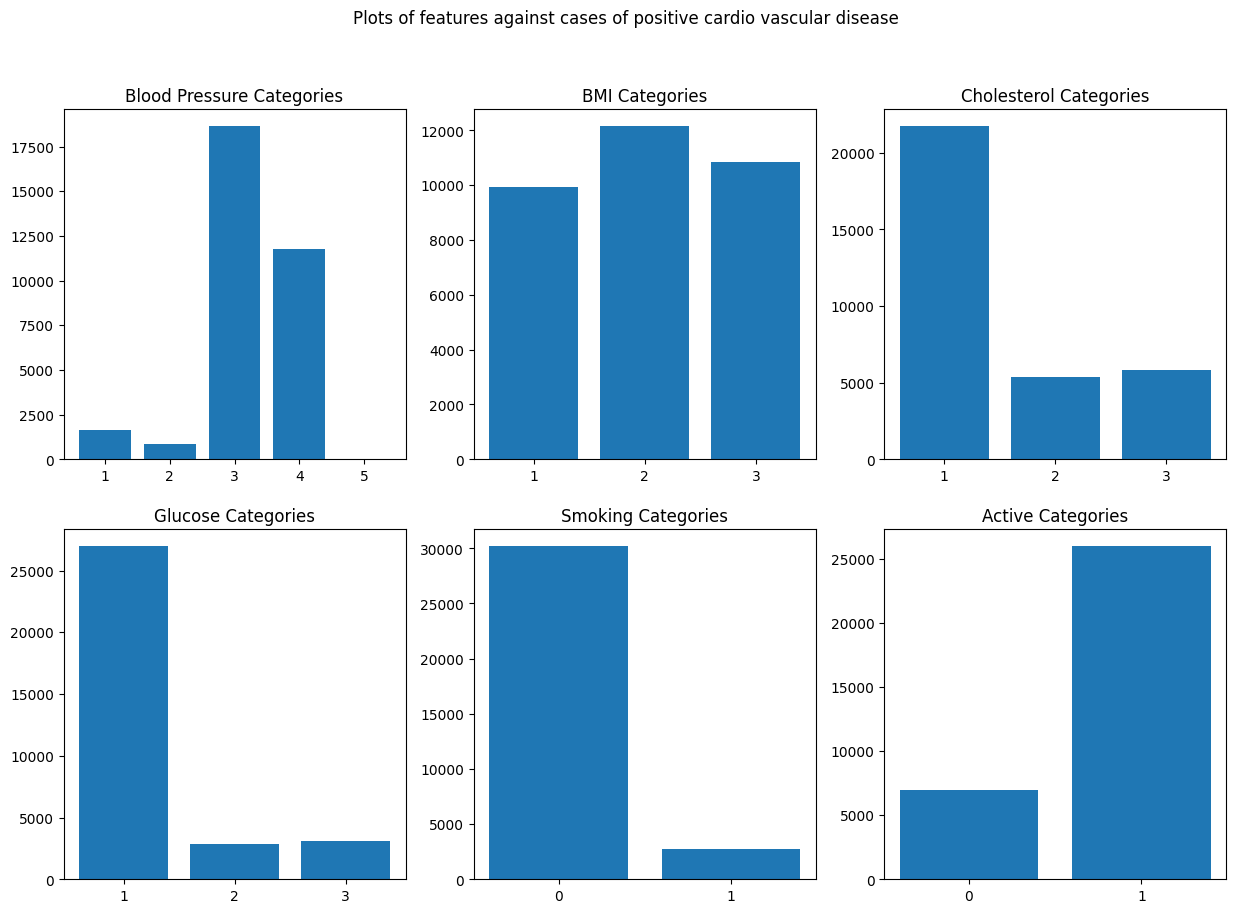

In [112]:
# create subplots with a feature against amount of positive cardio vascular disease cases. Example: blood pressure categories against positive cardio vascular disease cases, BMI categories against amount of positive cardio vascular disease cases, etc. Create these plots in a figure with multiple subplots.

# create a new column for the amount of positive cardio vascular disease cases

pos_cardio = df[df['cardio'] == 1]
neg_cardio = df[df['cardio'] == 0]

# create subplots

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle("Plots of features against cases of positive cardio vascular disease")

ax[0, 0].bar(pos_cardio['BP_category'].value_counts().index, pos_cardio['BP_category'].value_counts().values)
ax[0, 0].set_title("Blood Pressure Categories")

ax[0, 1].bar(pos_cardio['BMI_category'].value_counts().index, pos_cardio['BMI_category'].value_counts().values)
ax[0, 1].set_title("BMI Categories")
ax[0, 1].set_xticks([1,2,3])

ax[0, 2].bar(pos_cardio['cholesterol'].value_counts().index, pos_cardio['cholesterol'].value_counts().values)
ax[0, 2].set_xticks([1,2,3])
ax[0, 2].set_title("Cholesterol Categories")

ax[1, 0].bar(pos_cardio['gluc'].value_counts().index, pos_cardio['gluc'].value_counts().values)
ax[1, 0].set_xticks([1,2,3])
ax[1, 0].set_title("Glucose Categories")

ax[1, 1].bar(pos_cardio['smoke'].value_counts().index, pos_cardio['smoke'].value_counts().values)
ax[1, 1].set_xticks([0,1])
ax[1, 1].set_title("Smoking Categories")

ax[1, 2].bar(pos_cardio['active'].value_counts().index, pos_cardio['active'].value_counts().values)
ax[1, 2].set_xticks([0,1])
ax[1, 2].set_title("Active Categories")



# 2.2.1 Visualiseringar korrelation

<Axes: >

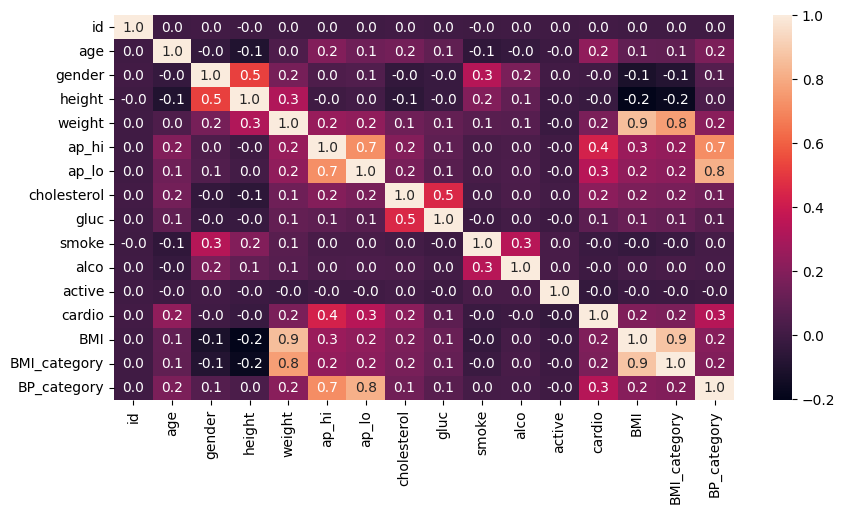

In [113]:
corr = df.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.1f')

In [114]:
corr = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr = corr[corr["level_0"] != corr["level_1"]]
corr.columns = ["feature1", "feature2", "corr"]

# removes all rows with dupplicate correlation values
corr = corr.drop_duplicates(subset=["corr"], keep="first")

corr.sort_values("corr", ascending=False)
corr = corr.reset_index(drop=True)

In [115]:
corr.head(6)

,feature1,feature2,corr
0,BMI,BMI_category,0.875818
1,weight,BMI,0.858423
2,ap_lo,BP_category,0.812766
3,weight,BMI_category,0.760727
4,ap_lo,ap_hi,0.721886
5,BP_category,ap_hi,0.714942


- Korrelationen på BMI för raderna: 0, 1 och 3 är ganska självklart eftersom BMI och vikt är ju kopplade.
- Sedan är ju raderna för blodtryck korrelerande eftersom nivån på ap_hi och ap_lo påverkar vilken BP-kategori som skapas.
- Finns i stort sett inget som är negativt korrelerande i heatmapen

# 2.3 Skapa två dataset

In [127]:
df_1 = df.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'], axis=1)
df_2 = df.drop(['height', 'weight', 'BMI_category', 'BP_category'], axis=1)

df_1

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI_category,BP_category
0,0,50,2,1,1,0,0,1,0,1,3.0
1,1,55,1,3,1,0,0,1,1,3,4.0
2,2,52,1,3,1,0,0,0,1,1,3.0
3,3,48,2,1,1,0,0,1,1,2,4.0
5,8,60,1,2,2,0,0,0,0,2,3.0
...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,1,1,0,0,1,1,2,3.0
69995,99993,53,2,1,1,1,0,1,0,2,3.0
69997,99996,52,2,3,1,0,1,0,1,3,4.0
69998,99998,61,1,1,2,0,0,0,1,2,3.0


In [128]:
df_2

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,150,80,1,1,0,0,1,1,29.384757
69995,99993,53,2,120,80,1,1,1,0,1,0,26.927438
69997,99996,52,2,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,135,80,1,2,0,0,0,1,27.099251


# 2.4 Välj modell

- Jag har valt att testa följande modeller: 
* Linear Regression
* Decision tree
* Random forest
* KNN
* Gradient boosting

# Linear regression 

In [153]:
# use linear regression on df_1 to predict the BMI
# use linear regression on df_2 to predict the blood pressure category

# split the data into training and testing data

from sklearn.model_selection import train_test_split

X = df_2.drop(['active'], axis=1)
y = df_2['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((52218, 11), (13055, 11), (52218,), (13055,))

In [167]:
df_2

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,58,1,150,80,1,1,0,0,1,1,29.384757
69995,99993,53,2,120,80,1,1,1,0,1,0,26.927438
69997,99996,52,2,180,90,3,1,0,1,0,1,31.353579
69998,99998,61,1,135,80,1,2,0,0,0,1,27.099251


In [154]:
# scales dataset with feature standardization and normalization to make sure that the data is in the same range
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# här skulle vi kunna lägga in alla våra modeller som vi vill testa

scaler = StandardScaler()

# När vi kör vår data så kommer den att gå igenom två steg, först ska den skala datan och sedan ska den köra modellen
# Vi stoppar in träningsdatan i vår pipeline och sedan kör vi modellen
# Logistic regression har L2 som default penalty, vi kan ändra detta till L1 om vi vill
pipe_logistic = Pipeline([('scaler', scaler), ('log', LogisticRegression(penalty="elasticnet", solver="saga", multi_class="auto", max_iter=10000))])

# Specifera parametrar som vi vill tuna
param_grid_logistic = {'log__l1_ratio': np.linspace(0, 1, 20)}

classifier_log = GridSearchCV(estimator=pipe_logistic, param_grid=param_grid_logistic, cv=5, scoring="accuracy")

- gridsearch görs bara på training set

In [155]:
print(classifier_log)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')


In [156]:
# tränar modellen
classifier_log.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log',
                                        LogisticRegression(max_iter=10000,
                                                           penalty='elasticnet',
                                                           solver='saga'))]),
             param_grid={'log__l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])},
             scoring='accuracy')

In [157]:
classifier_log.best_estimator_.get_params() # kollar vilka parametrar som är bäst för vår modell baserat på vår gridsearch
# När den tränar så gör den cross-validation

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('log',
   LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                      solver='saga'))],
 'verbose': False,
 'scaler': StandardScaler(),
 'log': LogisticRegression(l1_ratio=0.0, max_iter=10000, penalty='elasticnet',
                    solver='saga'),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log__C': 1.0,
 'log__class_weight': None,
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': 0.0,
 'log__max_iter': 10000,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'elasticnet',
 'log__random_state': None,
 'log__solver': 'saga',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [158]:
y_pred_log = classifier_log.predict(X_test)
y_pred_log

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [164]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [165]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2604
           1       0.80      1.00      0.89     10451

    accuracy                           0.80     13055
   macro avg       0.40      0.50      0.44     13055
weighted avg       0.64      0.80      0.71     13055



c:\Users\Danne\.virtualenvs\Machine-learning-PT8MuEHh\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Danne\.virtualenvs\Machine-learning-PT8MuEHh\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Danne\.virtualenvs\Machine-learning-PT8MuEHh\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

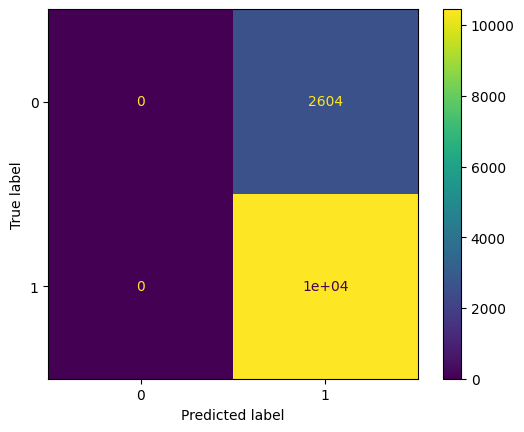

In [166]:
cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
#https://www.statology.org/valueerror-unknown-label-type-continuous/
LogisticRegression.get_params(grid) # kan göra såhär för att hita hyperparametrarna som vi kan använda oss av